In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()



In [2]:
df1 = pd.read_csv("vocop-clustered-new.csv", sep='\t') 
df = pd.DataFrame(df1)

C:\Users\Eva van Dijk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,27,35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# import street map
street_map = gpd.read_file('Data Stories/ne_10m_admin_0_map_subunits/ne_10m_admin_0_map_subunits.shp')
border1 = gpd.read_file('Data Stories/ne_10m_admin_0_boundary_lines_land/ne_10m_admin_0_boundary_lines_land.shp')
border2 = gpd.read_file('Data Stories/ne_10m_admin_0_boundary_lines_map_units/ne_10m_admin_0_boundary_lines_map_units.shp')
land = gpd.read_file('Data Stories/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
ocean = gpd.read_file('Data Stories/ne_10m_ocean/ne_10m_ocean.shp')


In [7]:
# designate coordinate system
crs = {'init':'espc:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['LON'], df['LAT'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

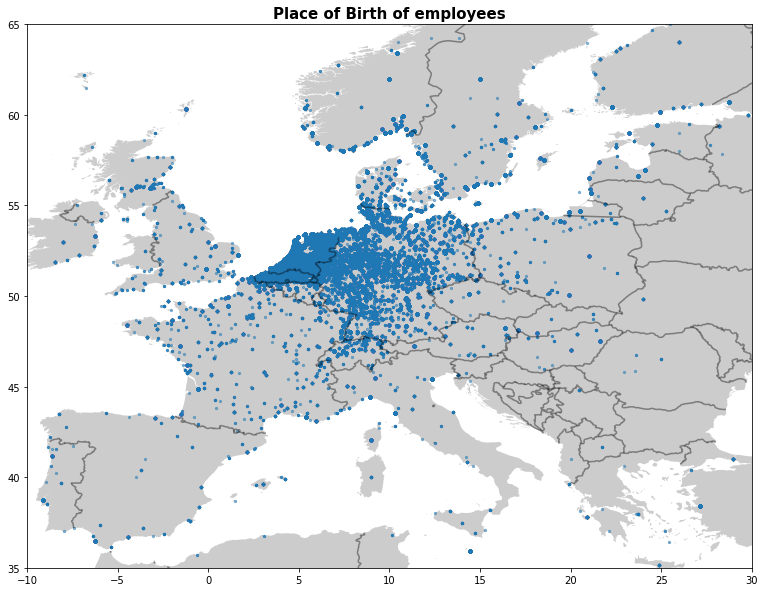

In [8]:
from shapely.geometry import Point
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(50,10))

# add .shp mapfile to axes
# street_map.plot(ax=ax, alpha=0.4,color='grey')
land.plot(ax=ax, alpha=0.4, color='grey')
border1.plot(ax=ax, alpha=0.4, color='black')
border2.plot(ax=ax, alpha=0.4, color='black')


# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=5)

# add title to graph
plt.title('Place of Birth of employees', fontsize=15,fontweight='bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-10,30)
plt.ylim(35,65)

#plot oceans
# ocean.plot(ax=ax, color='white')


# show map
plt.show()

In [602]:
#count unique place of origine and the frequency
df_count = df.groupby('countryCode')['VOCOP_id'].nunique()
df_count = pd.DataFrame(df_count)


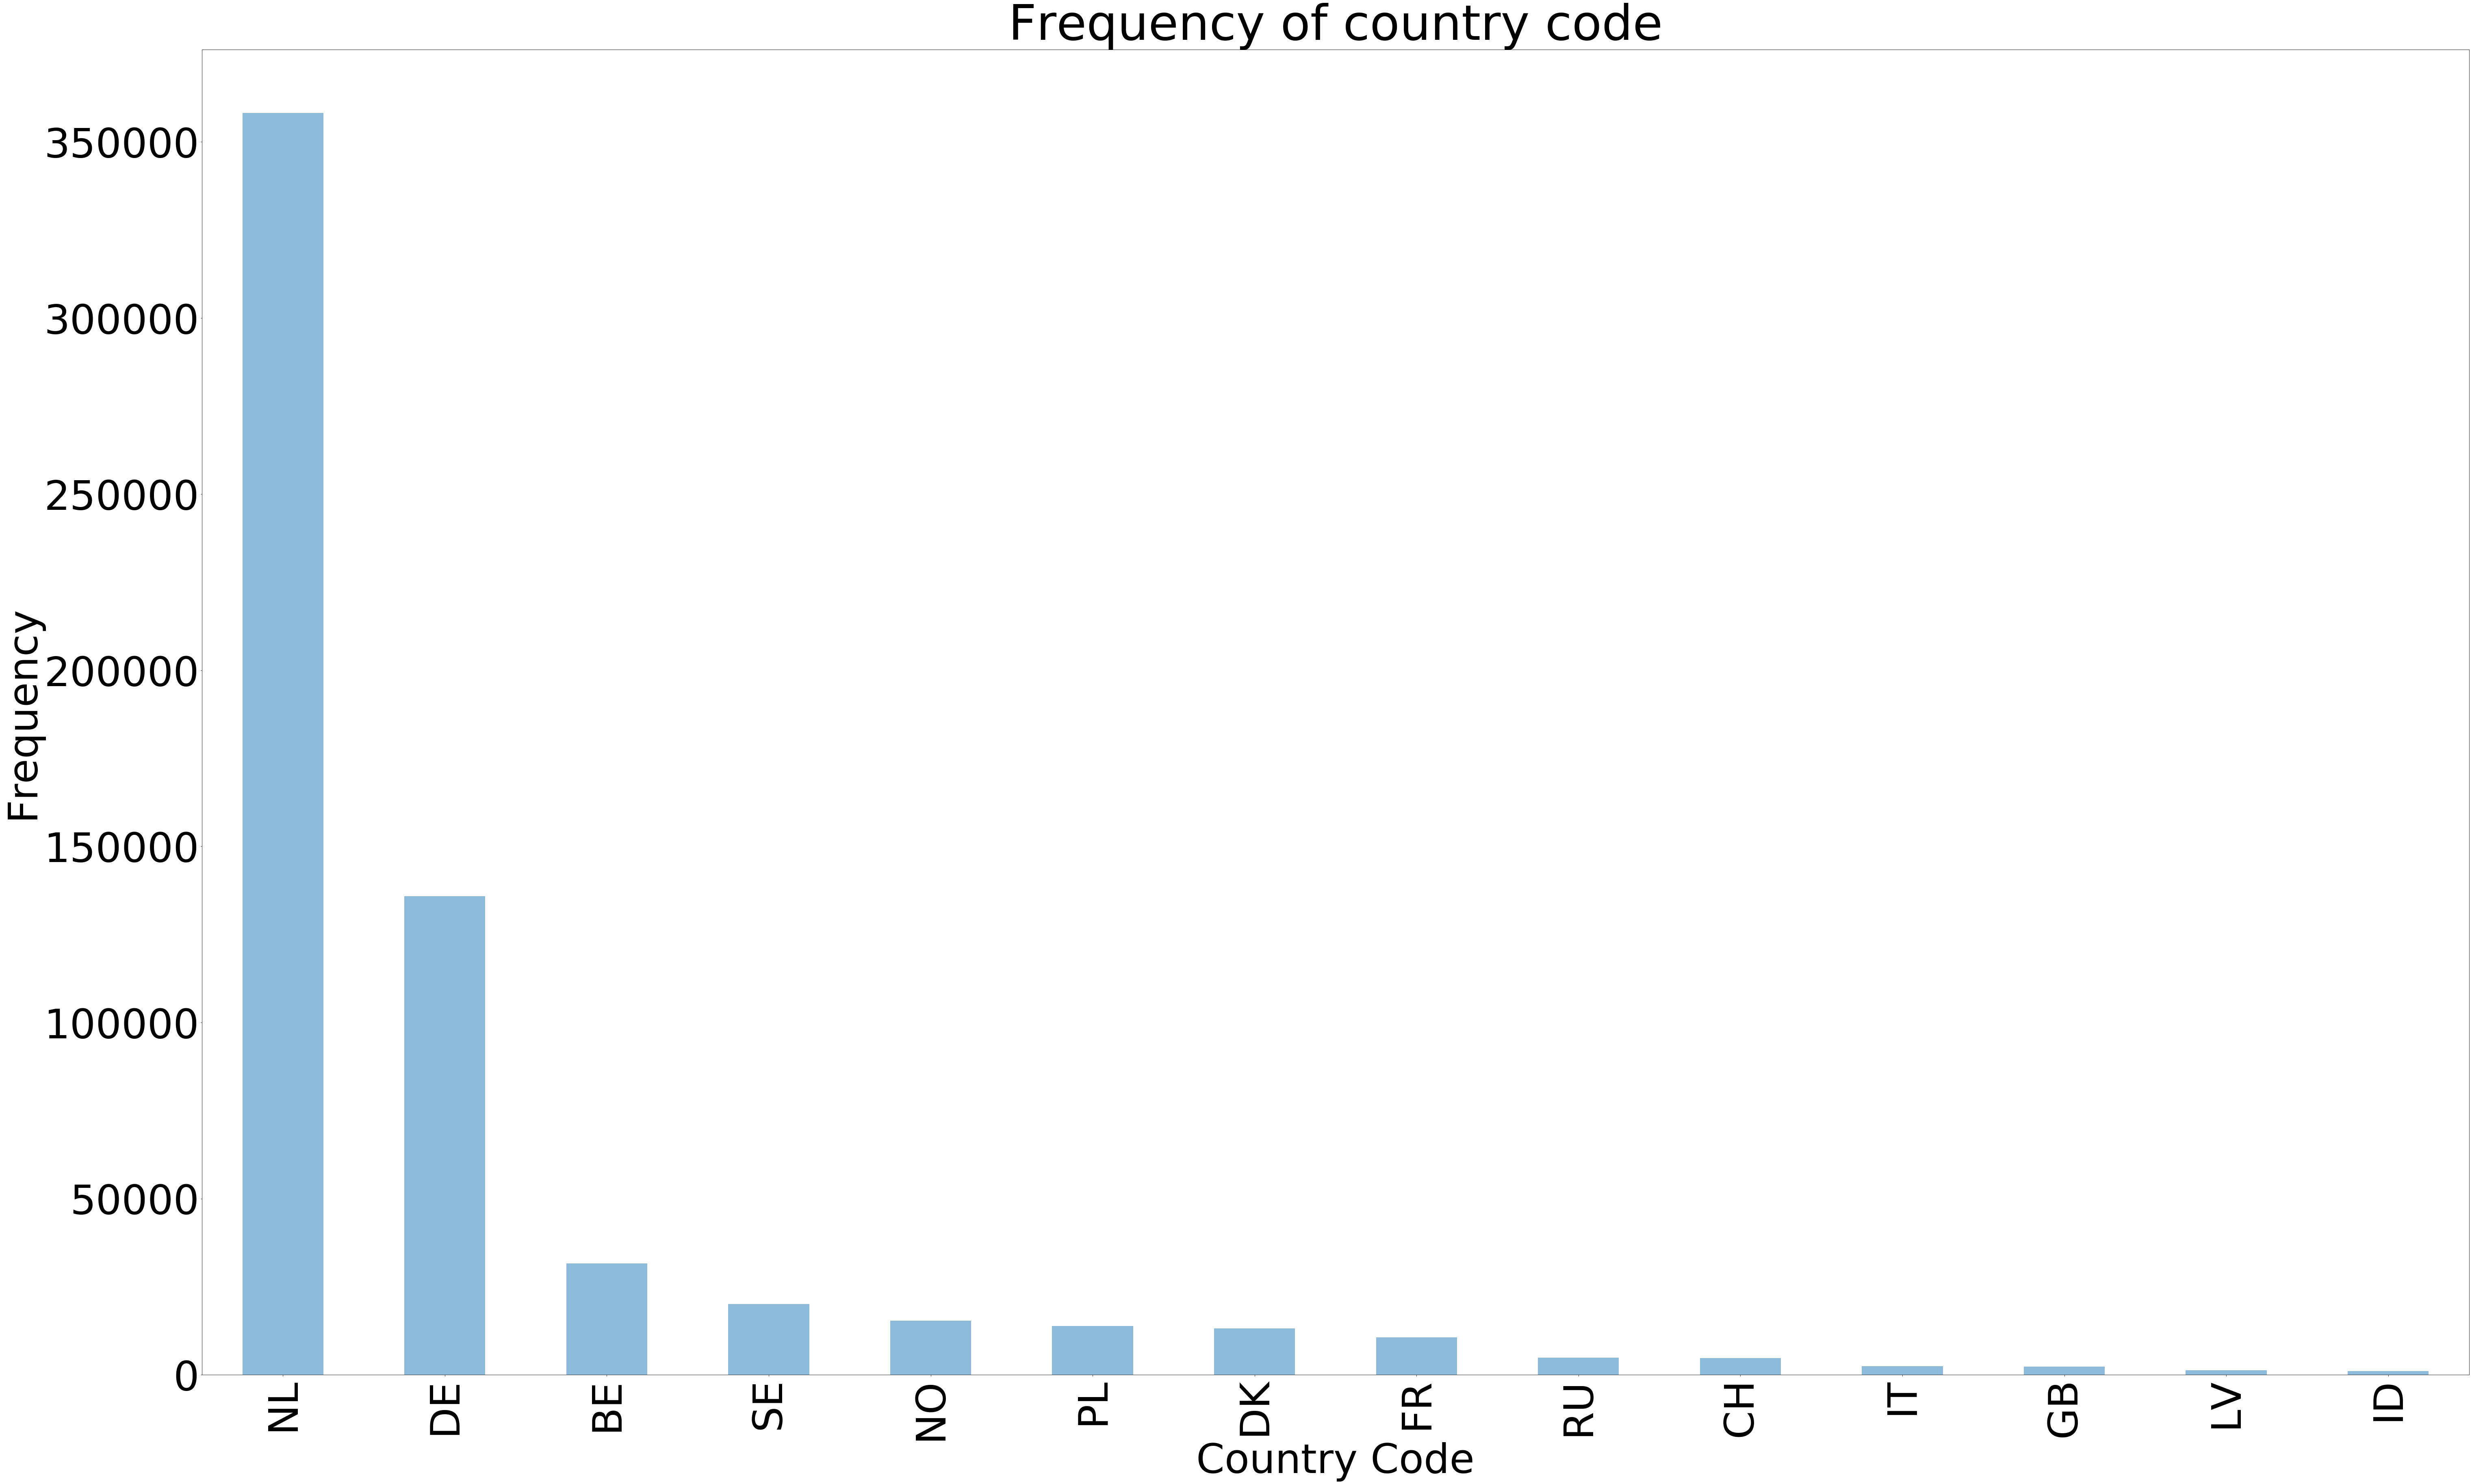

In [606]:
#plot graph of most frequent country codes
fig, ax = plt.subplots(figsize=(100,60))
number = df['countryCode'].value_counts()
criteria = number[number >= 1000] #only frequencies greater than 1000
graph = pd.DataFrame(criteria)
graph.plot(ax=ax, kind='bar', align='center', alpha=0.5, legend=False)
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Frequency of country code')
plt.rcParams.update({'font.size': 100})
plt.legend('Frequency').set_visible(False)


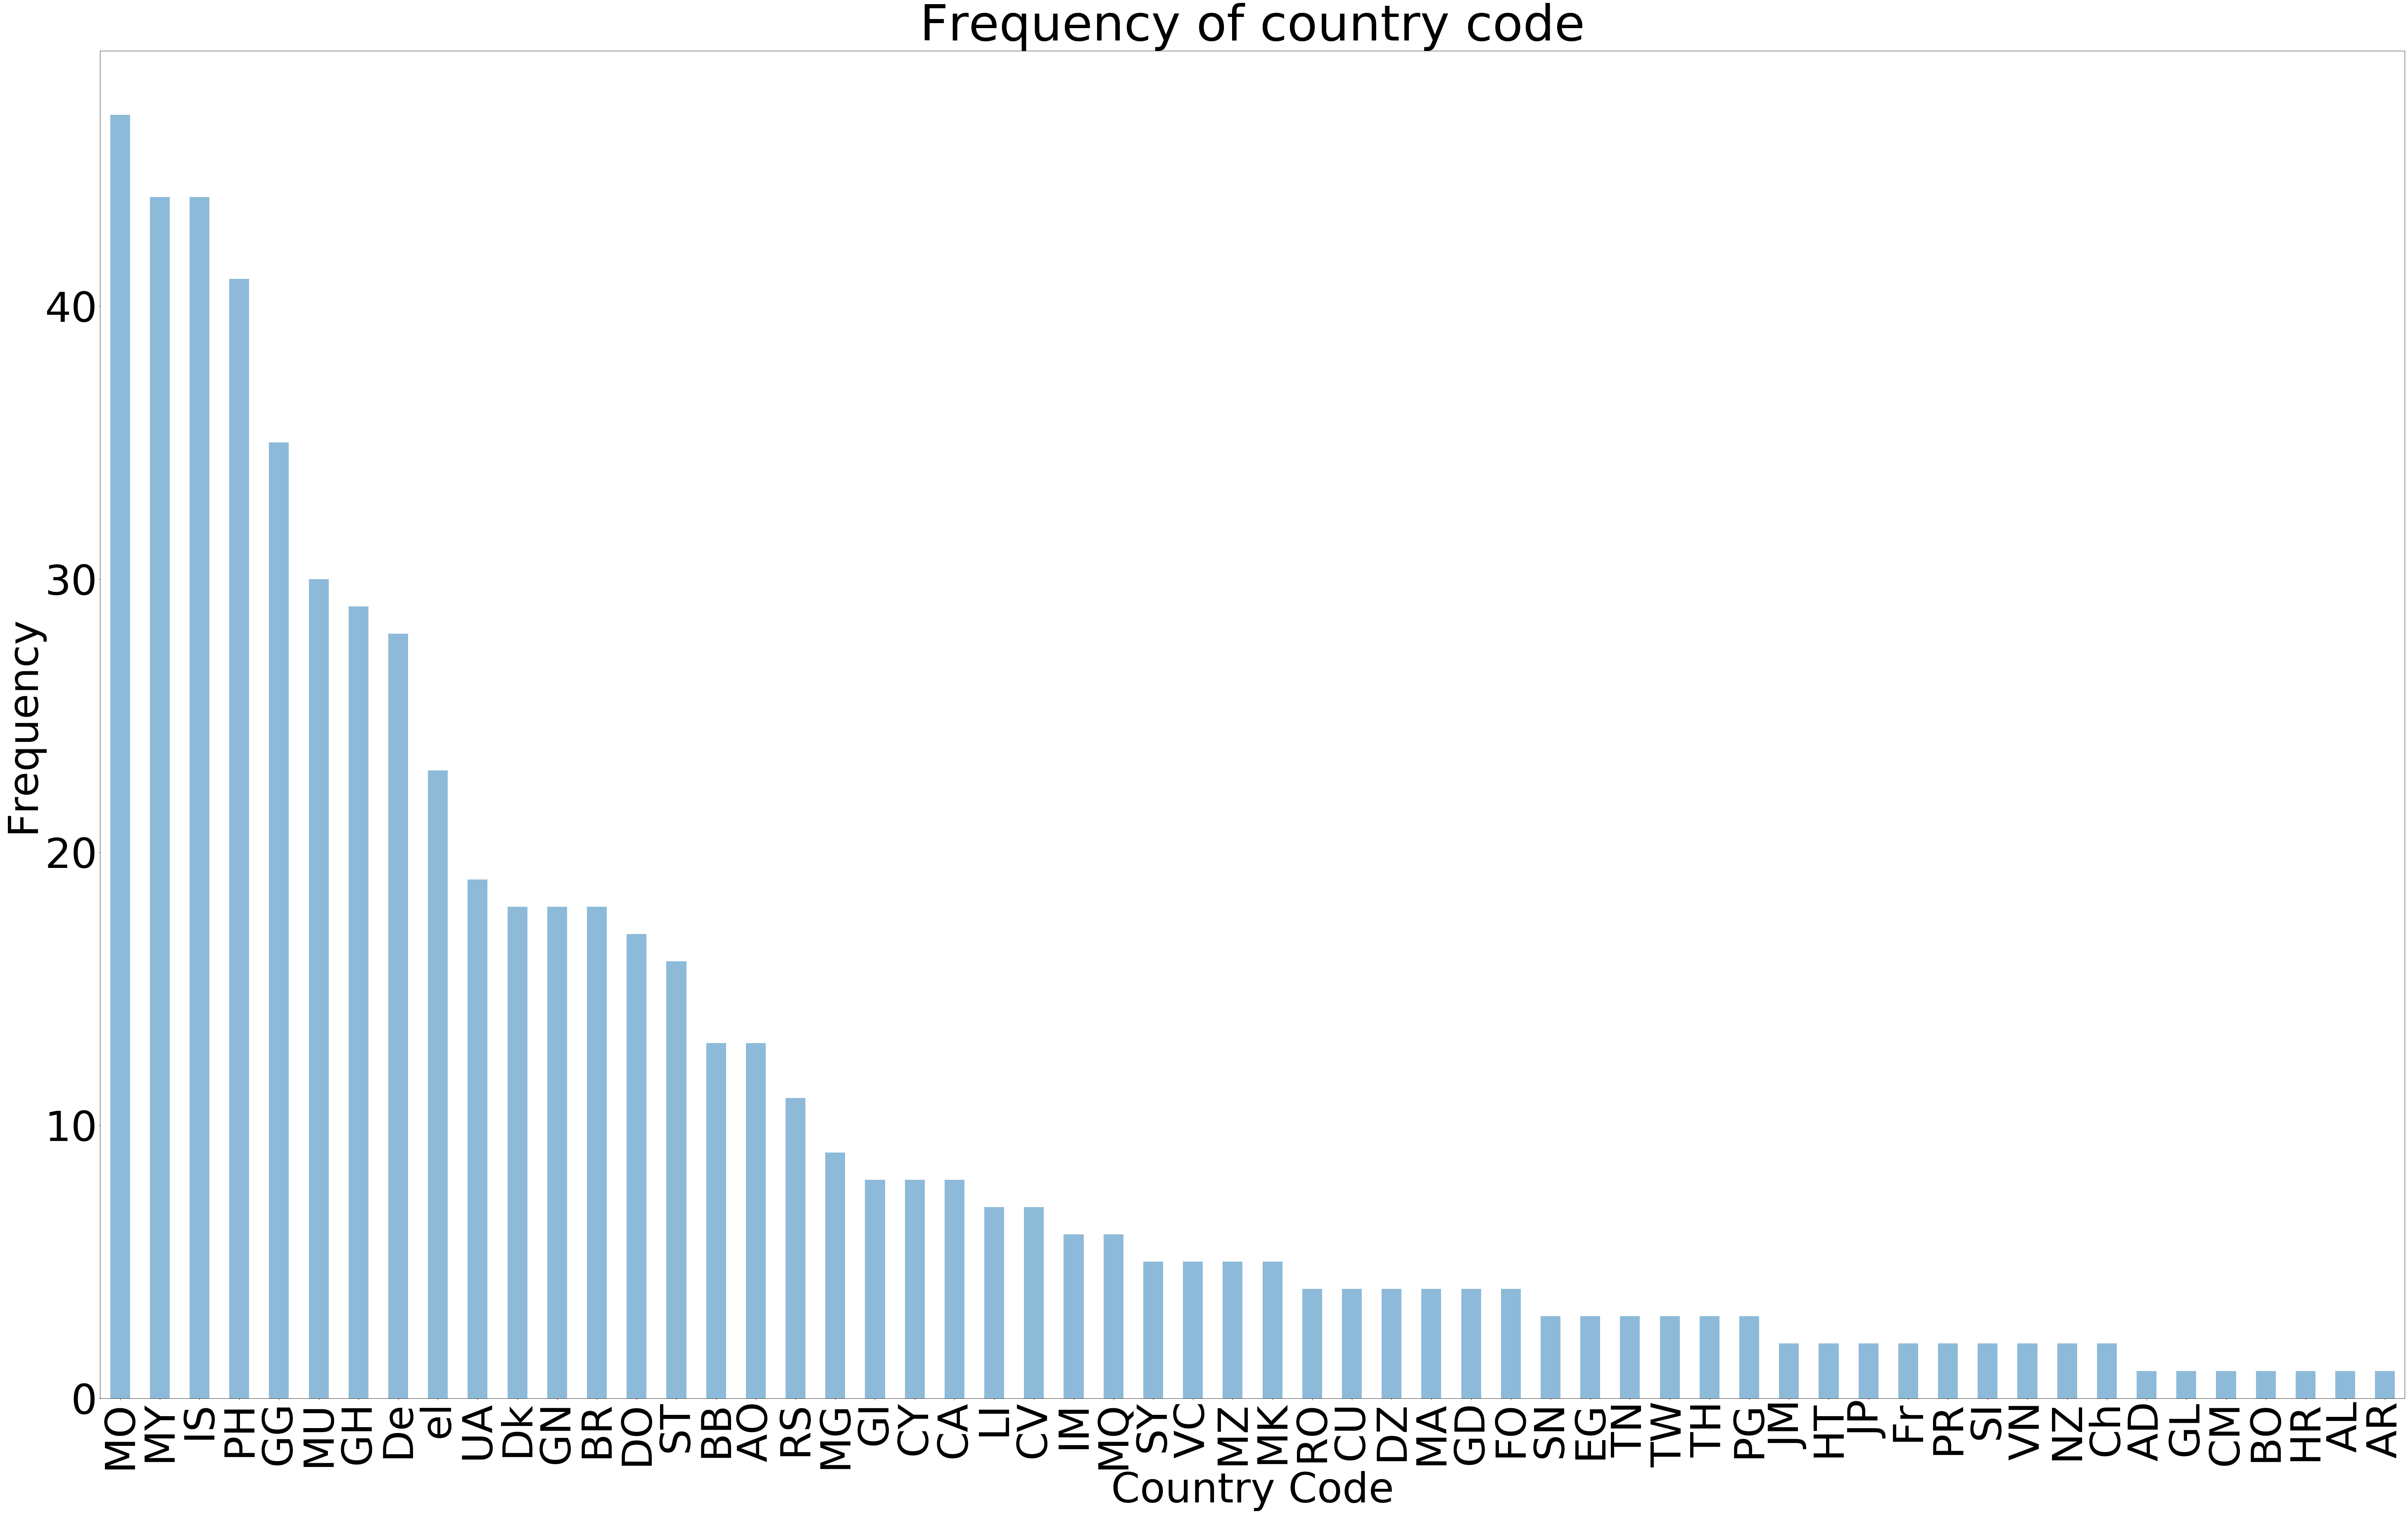

In [11]:
#plot graph of less frequent country codes
fig, ax = plt.subplots(figsize=(100,60))
number = df['countryCode'].value_counts()
criteria = number[number < 50] #only frequencies less than 50
graph = pd.DataFrame(criteria)
graph.plot(ax=ax, kind='bar', align='center', alpha=0.5, legend=False)
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Frequency of country code')
plt.rcParams.update({'font.size': 100})
plt.legend('Frequency').set_visible(False)

Employees per time period


In [607]:
# date_begin_service_complete 
# date_end_service_complete 
df_time = df.groupby('date_end_service_complete')['VOCOP_id'].nunique()


In [278]:
# alles met een jaar voor 1633 of na 1794 kun je weglaten
df_time_filter = df[(df['date_begin_service_complete'] > '1632-12-31') & (df['date_begin_service_complete'] < '1795-01-01')]
df_time_filter_2 = df_time_filter[(df_time_filter['date_end_service_complete'] > '1632-12-31') & (df_time_filter['date_end_service_complete'] < '1795-01-01')]


In [167]:
#create new datasets just containing the begin and end date
begin = df_time_filter_2['date_begin_service_complete']
end = df_time_filter_2['date_end_service_complete']


In [168]:
#adjust begin and end dataset; make dataframes and transform into the right datetime format
import datetime
begin = pd.to_datetime(begin, format='%Y-%M-%d', errors = 'coerce')
begin = pd.DataFrame(begin)
begin.columns = ['begin_time']
end = pd.to_datetime(end, format='%Y-%M-%d', errors = 'coerce')
end = pd.DataFrame(end)
end.columns = ['end_time']

In [66]:
#get rid of the time of the datetime format
begin['begin_time'] = begin['begin_time'].dt.strftime("%Y/%m/%d")
end['end_time'] = end['end_time'].dt.strftime("%Y/%m/%d")

In [293]:
#resample using years and count the amount of beginning employees at the end of every year.
df_time_filter_2['date_begin_service_complete'] = pd.to_datetime(df_time_filter_2['date_begin_service_complete'], format='%Y-%m', errors = 'coerce')
df_res_begin = df_time_filter_2.resample('Y', on='date_begin_service_complete').count()

C:\Users\Eva van Dijk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [608]:
#get rid of all the unnecessary columns
df_res_begin = df_res_begin['VOCOP_id']


In [610]:
#resample using years and count the amount of ending employees at the end of every year.
df_time_filter_2['date_end_service_complete'] = pd.to_datetime(df_time_filter_2['date_end_service_complete'], format='%Y-%M-%d', errors = 'coerce')
df_res_end = df_time_filter_2.resample('Y', on='date_end_service_complete').count()


C:\Users\Eva van Dijk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [611]:
#get rid of all the unnecessary columns
df_res_end = df_res_end['VOCOP_id']


In [287]:
#calculate the difference between the amount of people starting and ending their employment within a year. 
df_dif = df_res_begin - df_res_end
df_dif = pd.to_numeric(df_dif)

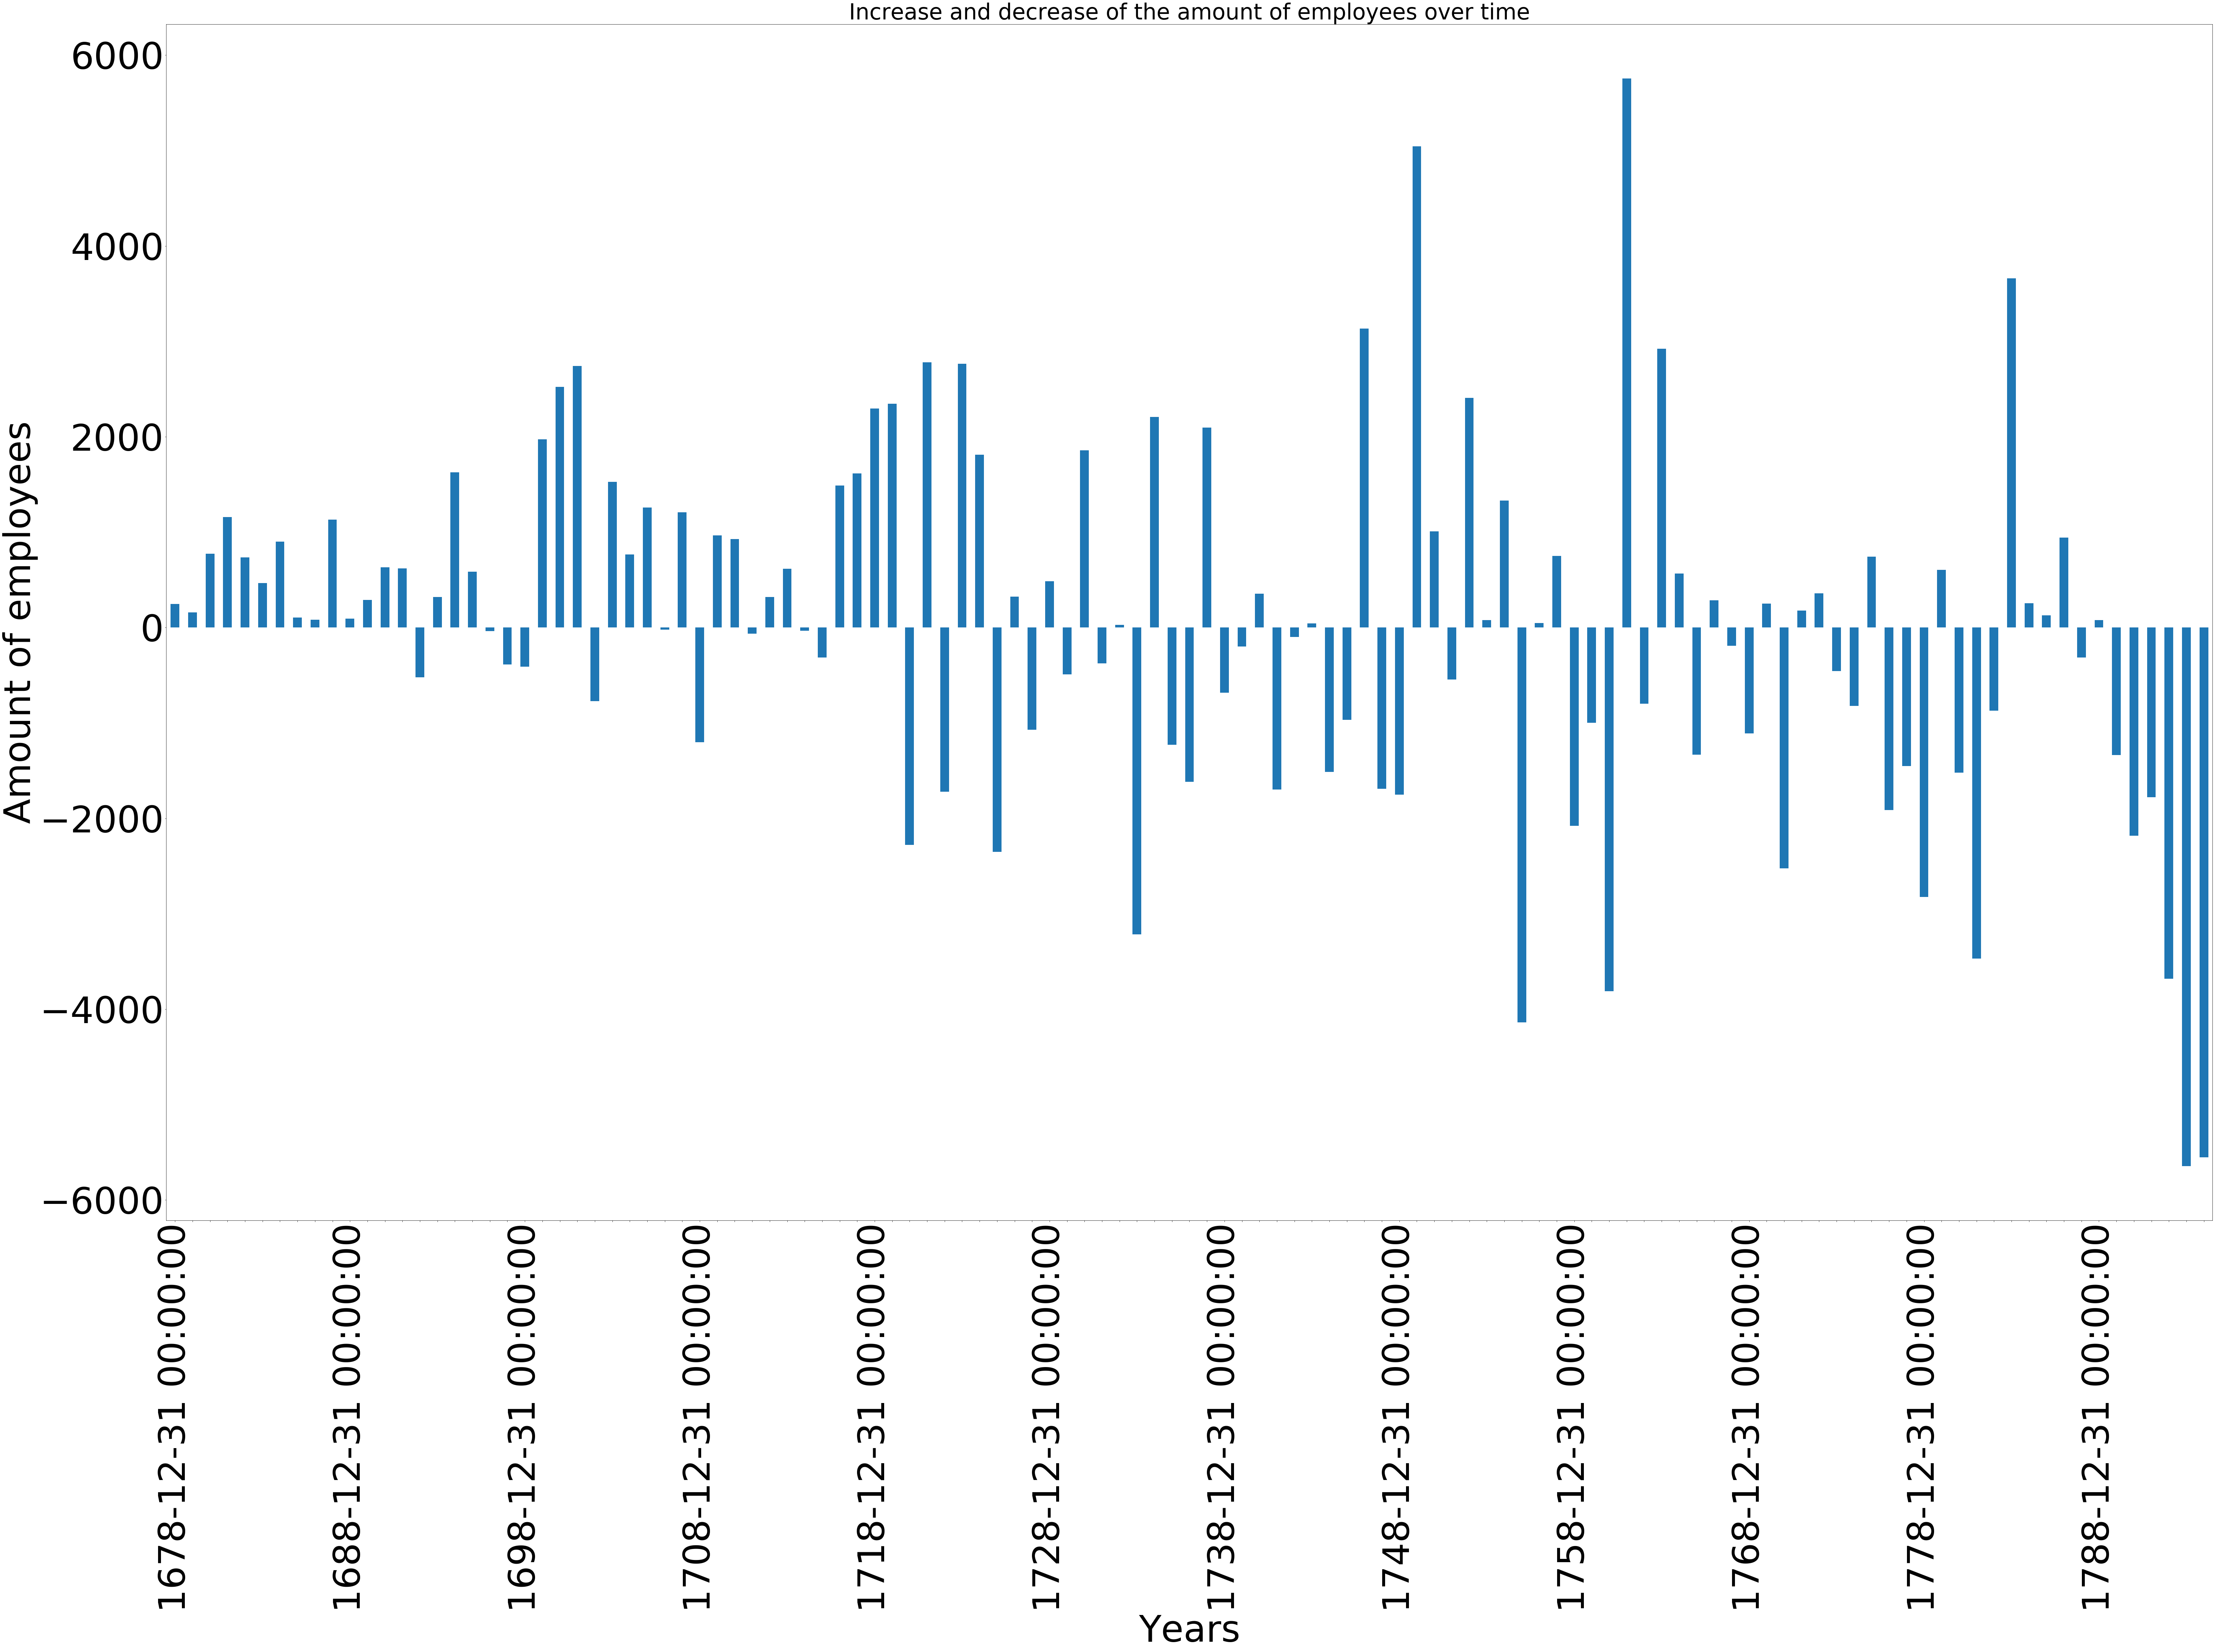

In [288]:
#Plot the graph about the increase/decrease of employees over time. 
df_dif = df_res_begin - df_res_end
fig, ax = plt.subplots(figsize=(100,60))
df_dif.plot(ax=ax, kind='bar', legend=False)
plt.rcParams.update({'font.size': 50})
plt.xlabel('Years')
plt.ylabel('Amount of employees')
plt.title('Increase and decrease of the amount of employees over time')
plt.rcParams.update({'font.size': 100})
plt.legend('Frequency').set_visible(False)
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

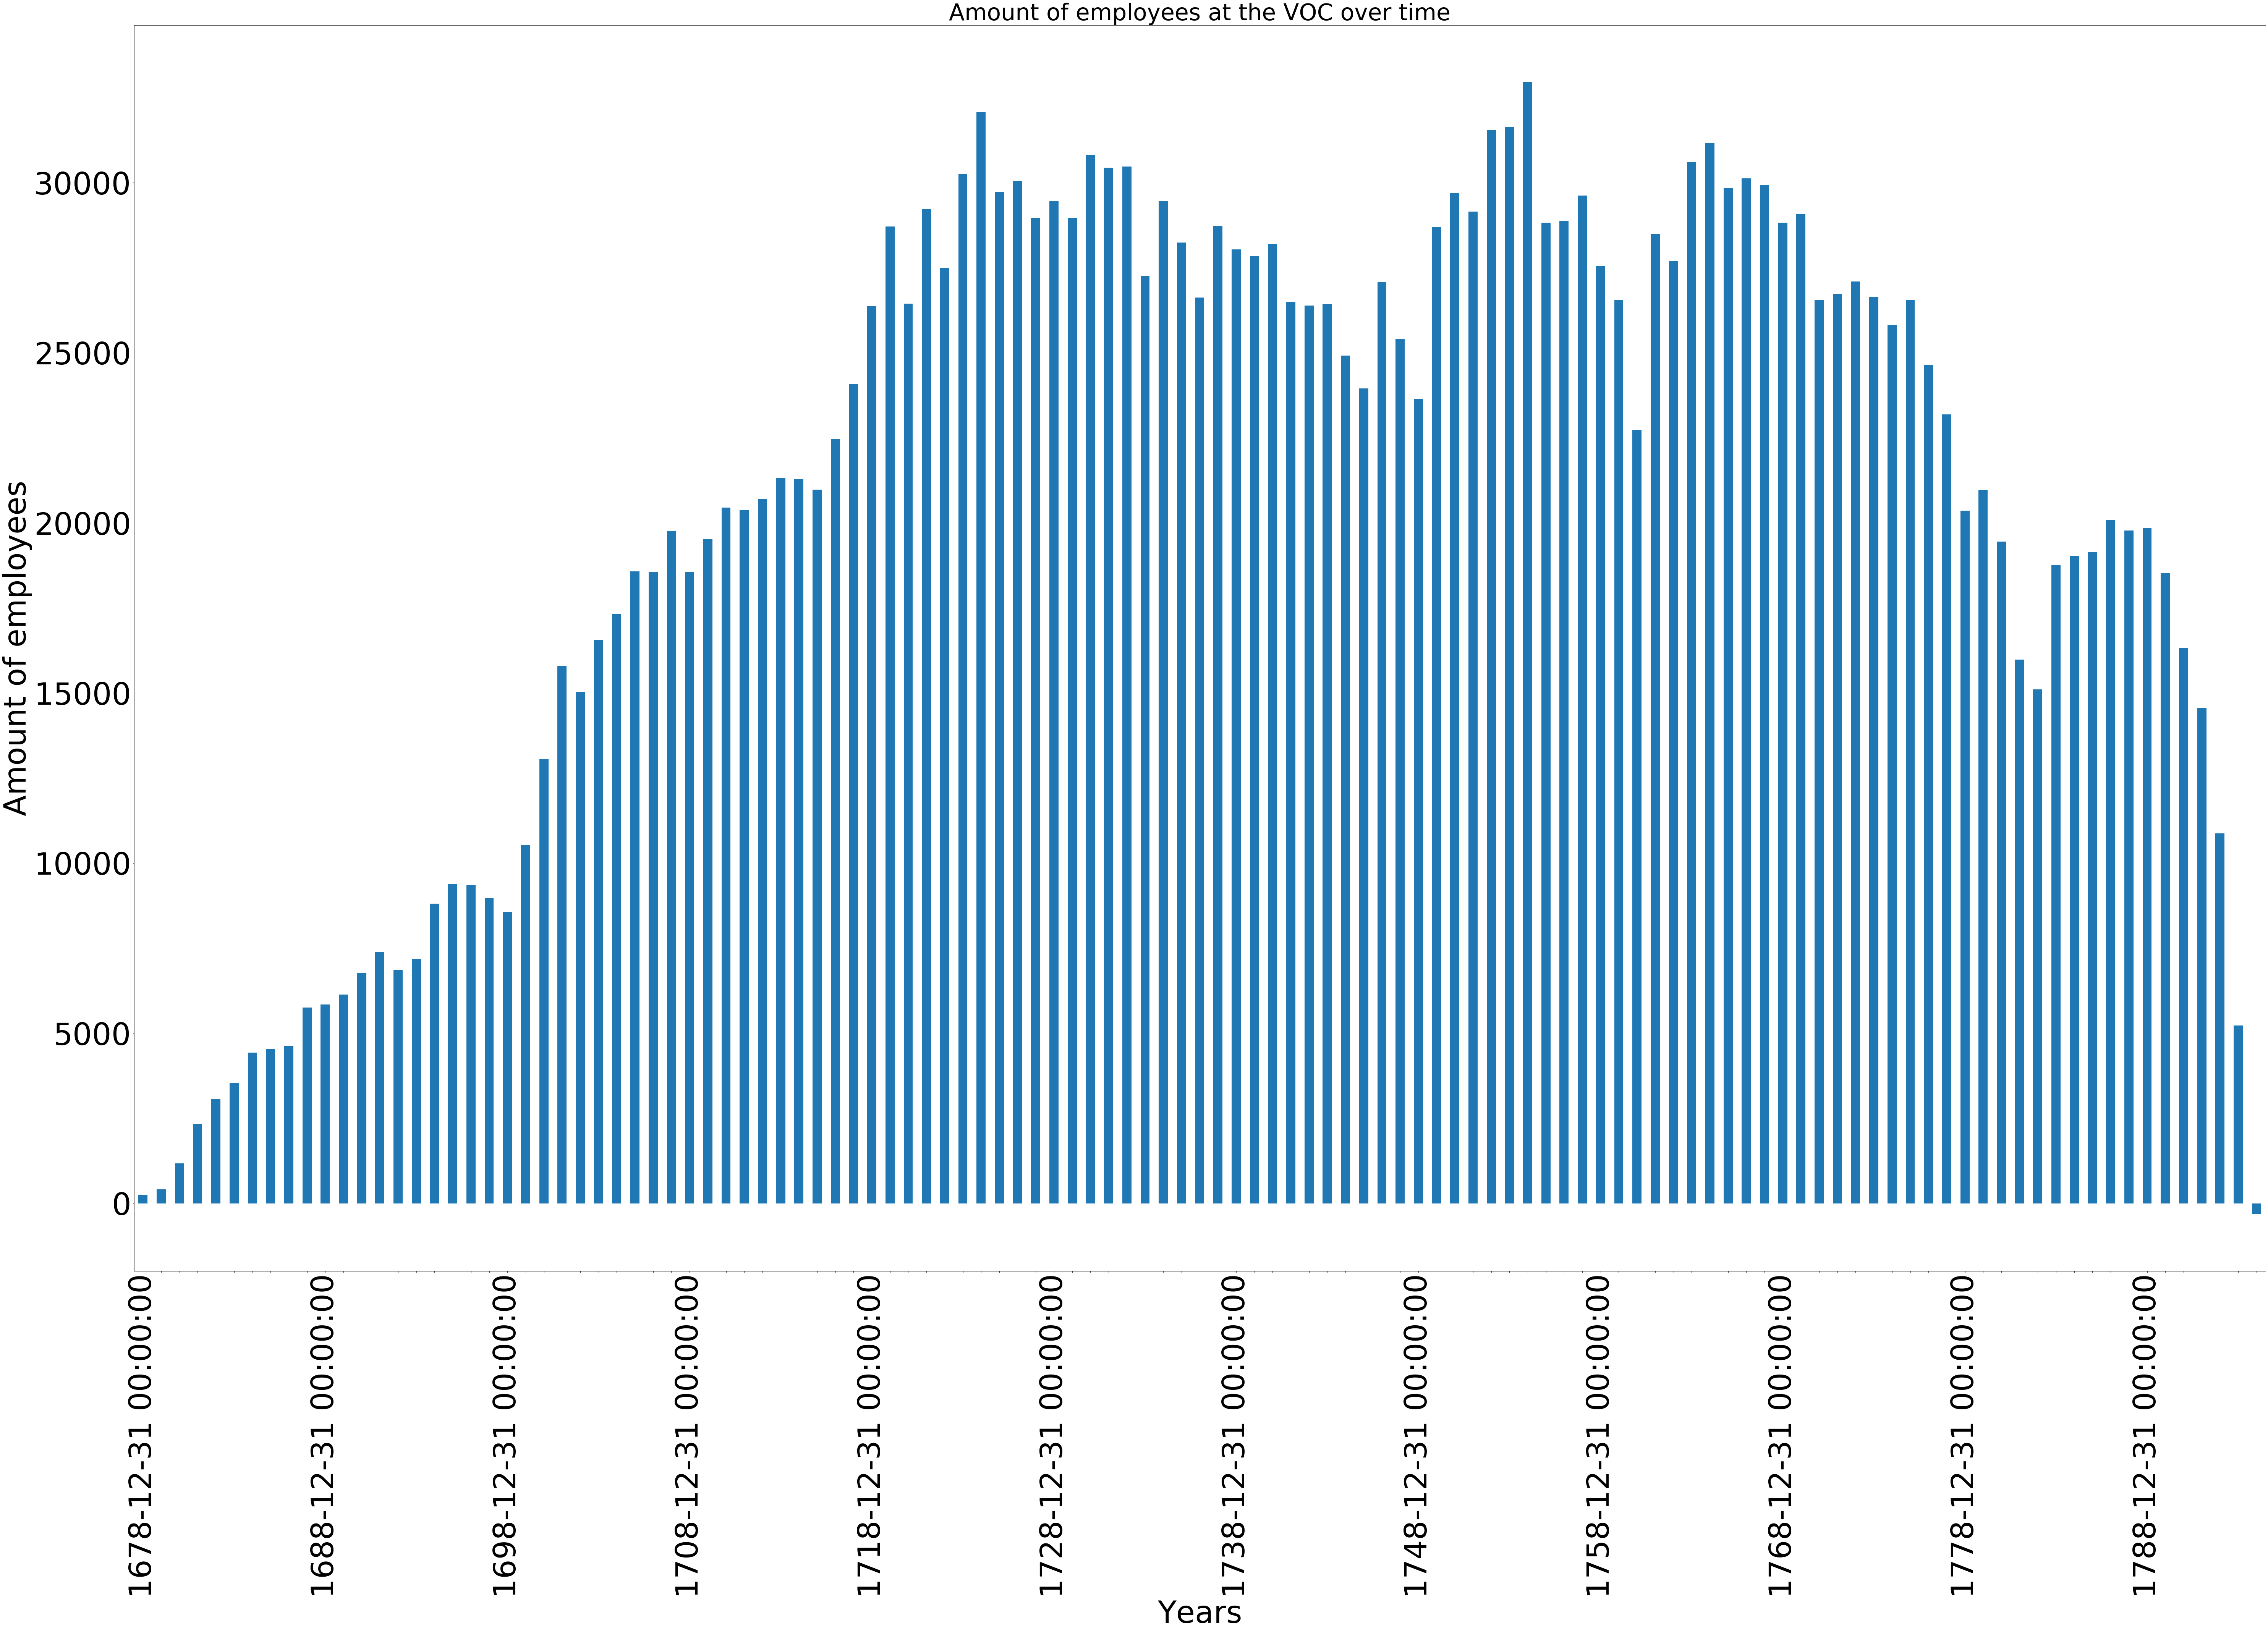

In [255]:
#plot the amount of employees over time within the VOC
df_cum = df_dif.cumsum()
fig, ax = plt.subplots(figsize=(100,60))
df_cum.plot(ax=ax, kind='bar', legend=False)
plt.rcParams.update({'font.size': 50})
plt.xlabel('Years')
plt.ylabel('Amount of employees')
plt.title('Amount of employees at the VOC over time')
plt.rcParams.update({'font.size': 80})
plt.legend('Frequency').set_visible(False)
# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
# ax.xaxis.set_minor_locator(plt.MaxNLocator(3))
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 10))
# ax.xaxis.set_minor_locator(plt.MaxNLocator(10))
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


Search for right individu for the data stories

In [612]:
#select individu who's career will be analyzed. 
proef2 = proef[proef['fullNameOriginal'] == 'Cornelis Vis'] 
df_proef = proef2[proef2['toponymCountryCode'] == 'Colijnsplaat NL']


In [614]:
#service time in days per record and in total
from datetime import date

#index 52822
d1 = date(1734,11,22)
d2 = date(1737,6,30)

time1=d2-d1
print("Days of employement: ", time1)

#index 60688
d3 = date(1738,6,2)
d4 = date(1741,9,27)

time2=d4-d3
print("Days of employement: ",time2)

#index 66931
d5 = date(1744,12,9)
d6 = date(1748,9,2)

time3=d6-d5
print("Days of employement: ",time3)

#index 82692
d7 = date(1750,3,26)
d8 = date(1751,10,6)

time4=d8-d7
print("Days of employement: ",time4)

#Total days of servicetime
totaal = time1 + time2 + time3 + time4
print("Total amount of days of employment: ", totaal)

Days of employement:  951 days, 0:00:00
Days of employement:  1213 days, 0:00:00
Days of employement:  1363 days, 0:00:00
Days of employement:  559 days, 0:00:00
Total amount of days of employment:  4086 days, 0:00:00


In [340]:
#standard wage for individu per record in the dataset
df_proef['wageStandard_DASminSupplementedBeini']

52822     26.0
60688     32.0
66931    100.0
82692     80.0
Name: wageStandard_DASminSupplementedBeini, dtype: float64

In [350]:
#HISCO codes for the individu per recor in the dataset
df_proef['HISCO_CODE']

52822     4200
60688     4200
66931     4217
82692    58320
Name: HISCO_CODE, dtype: object

In [592]:
#remove rows without a cluster id (do not have multiple records)
df_cluster = df[df['cluster_ID'].notnull()]


In [384]:
#sort rows on cluster id to group the records of each individu
df_cluster.sort_values(by=['cluster_ID'], inplace=True, ascending=True)


C:\Users\Eva van Dijk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [379]:
#compare stardard wage of dataset with manually checked stardard wage to see if there is any variation
df_man1 = pd.read_csv("Data Stories/sample_VOCOP_manually.csv") 
df_man = pd.DataFrame(df_man1)


In [370]:
#vocop ids of individu were not found in this dataset.
var = df_man[df_man['VOCOP_id'] == '252036']
var

,VOCOP_id,rank,rank_NL,full_name,handle_scan,link,monthly_wage,correct_rank,remarks,country,rank_adjusted;


In [616]:
#difference in wage between different ranks in percentges.
#An increase of the wage has been defined as a promotion
#A decrease of the wage has been defined as a demotion.
#If there is no change in the wage, it is being defined as a 'no change'
dif_proef = (df_proef['wageStandard_DASminSupplementedBeini'].diff() / df_proef['wageStandard_DASminSupplementedBeini'].shift()) * 100
round(dif_proef, 2)
dif_proef = dif_proef.tolist()
dif_proef = list(np.around(np.array(dif_proef),2))

for x in dif_proef:
    if x>0:
        print('Promotion by ', x, ' percent')
    if x<0:
        print('Demotion by ', x, ' percent')
    if x==0:
        print('No change')

Promotion by  23.08  percent
Promotion by  212.5  percent
Demotion by  -20.0  percent


In [618]:
#amount of travels of the individu (who has a cluster id and went certainly on multiple travels)
number_travel = df_proef.groupby('cluster_ID')['VOCOP_id'].nunique().tolist()
print("The total amount of travels of the individu is:", number_travel)


The total amount of travels of the individu is: [4]


In [623]:
#reason why the individu disappears from the dataset (is already in the dataset)
print("The reason per record why the individu ended his employment:\n", df_proef['reasonEndService'])

The reason per record why the individu ended his employment:
 52822    Repatriated
60688    Repatriated
66931    Repatriated
82692    Repatriated
Name: reasonEndService, dtype: object


In [472]:
#starting point of individu's career
min_start = min(df_proef['date_begin_service_complete'])
start = df_proef.loc[df_proef['date_begin_service_complete'] == min_start, 'rank'].item()
print("The starting point of the career is: ", start)

#end point of individu's career
max_start = max(df_proef['date_begin_service_complete'])
end = df_proef.loc[df_proef['date_begin_service_complete'] == max_start, 'rank'].item()
print("The end point of the career is: ", end)

The starting point of the career is:  Third helmsman (derdewaak)
The end point of the career is:  Lieutenant captain (seaman)


In [625]:
#Test for mid demotion between two promotions. False means that there is no mid demotion found, true means that there is one.
#A mid demotion between two promotion gives the promotion another meaning than just two promotion in a row.  
mid_test = list()

for y in dif_proef:
    if y>0:
        y=1 #promotion
        mid_test.append(y)
        print(y) 
    if y<0:
        y=0 #demotion
        mid_test.append(y)
        print(y)
    if y==0:
        y=-1 #no change
        mid_test.append(y)
        

print("The employee has had a mid demotion between two promotions:", '1, 0, 1' in str(mid_test))

1
1
0
The employee has had a mid demotion between two promotions: False


In [601]:
#count number of travels before the first promotion. If the list is empty, the employe made his first promotion directly after his first travel.
prev = None
for index, obj in enumerate(mid_test):
    if obj == 1:
        if index > 0:
            prev = mid_test[0:index]
        if index == 0:
            prev = []
        break
    
if not prev:
    print("The employee made a promotion directly after his first travel.")
else:
    print("The employee made a promotion after", prev.count(0), "travel(s).")

The employee made a promotion directly after his first travel
